In [1]:
#import necessary libraries
"""
This cell imports the necessary libraries for data analysis and visualization.
"""
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime



In [2]:
"""
This cell loads the data from the csv file into a pandas dataframe.
"""
#load the data
data = pd.read_csv(r'archive/PRSA_Data_Dingling_20130301-20170228.csv')

In [3]:
"""
This cell displays the first few rows of the dataframe to get an overview of the data.
"""
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [4]:
#create year_month_day_hour column and set it as index
"""
This cell creates a new column 'year_month_day_hour' by combining the 'year', 'month', 'day', and 'hour' columns
and converts it to a datetime object. It then sets this new column as the index of the dataframe.
"""
data['year_month_day_hour'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month_day_hour
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00


In [5]:
#check info of the dataframe
"""
This cell checks the information of the dataframe to see the data types of the columns and if there are any missing values.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   35064 non-null  int64         
 1   year                 35064 non-null  int64         
 2   month                35064 non-null  int64         
 3   day                  35064 non-null  int64         
 4   hour                 35064 non-null  int64         
 5   PM2.5                34285 non-null  float64       
 6   PM10                 34408 non-null  float64       
 7   SO2                  34334 non-null  float64       
 8   NO2                  33830 non-null  float64       
 9   CO                   33052 non-null  float64       
 10  O3                   33850 non-null  float64       
 11  TEMP                 35011 non-null  float64       
 12  PRES                 35014 non-null  float64       
 13  DEWP                 35011 non-

In [6]:
# drop year, month, day, and hour columns
"""
This cell drops the 'year', 'month', 'day', and 'hour' columns from the dataframe as they are no longer needed.
"""
data.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
data.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month_day_hour
0,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00


In [7]:
#check shape of the dataframe
"""
This cell checks the shape of the dataframe to see the number of rows and columns in the dataset.
"""
data.shape

(35064, 15)

In [8]:
#print column names as list
"""
This cell prints the column names of the dataframe as a list.
"""
data.columns.tolist()

['No',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station',
 'year_month_day_hour']

In [9]:
#check for missing values
"""
This cell checks for missing values in the dataframe and prints the total number of missing values in each column.
"""
data.isnull().sum()

No                        0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
year_month_day_hour       0
dtype: int64

In [10]:
#query the Temperature column missing data
"""
This cell queries the rows where the 'TEMP' column has missing values and displays the rows with missing values.
"""
data[data['TEMP'].isnull()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month_day_hour
16748,16749,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-27 20:00:00
16813,16814,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-30 13:00:00
16829,16830,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-31 05:00:00
16873,16874,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-02 01:00:00
16883,16884,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-02 11:00:00
16930,16931,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-04 10:00:00
16933,16934,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-04 13:00:00
17007,17008,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-07 15:00:00
17030,17031,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-08 14:00:00
17052,17053,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-09 12:00:00


In [11]:
#count the temp column missing values
"""
This cell counts the number of missing values in the 'TEMP' column.
"""
data[data['TEMP'].isnull()].count()

No                     53
PM2.5                  53
PM10                   53
SO2                    53
NO2                    53
CO                     53
O3                     53
TEMP                    0
PRES                    3
DEWP                    0
RAIN                    3
wd                     10
WSPM                   10
station                53
year_month_day_hour    53
dtype: int64

In [12]:
#use plotly express to visualize the missing values
"""
This cell uses the plotly express library to visualize the missing values in the dataframe.
"""
import plotly.express as px
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Count']
fig = px.bar(missing_values, x='Column', y='Count', title='Missing Values Count')
fig.show()

In [13]:
#Visualize the PM2.5 column 
"""
This cell uses the plotly express library to visualize the 'PM2.5' column in the dataframe.
"""
fig = px.line(data, x='year_month_day_hour', y='PM2.5', title='TEMP with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [14]:
#Visualize the Temp column 
"""
This cell uses the plotly express library to visualize the 'Temp' column in the dataframe.
"""
fig = px.line(data, x='year_month_day_hour', y='TEMP', title='TEMP with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [15]:
#set index
"""
This cell sets the 'year_month_day_hour' column as the index of the dataframe.
"""
data.set_index('year_month_day_hour', inplace=True)

In [16]:
#check the data is indexed
"""
This cell checks if the data is indexed properly by displaying the first few rows of the dataframe.
"""
data.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [17]:
#drop null values
"""
This cell drops the rows with missing values in the dataframe.
"""
df =data.copy()
df.dropna(inplace=True)

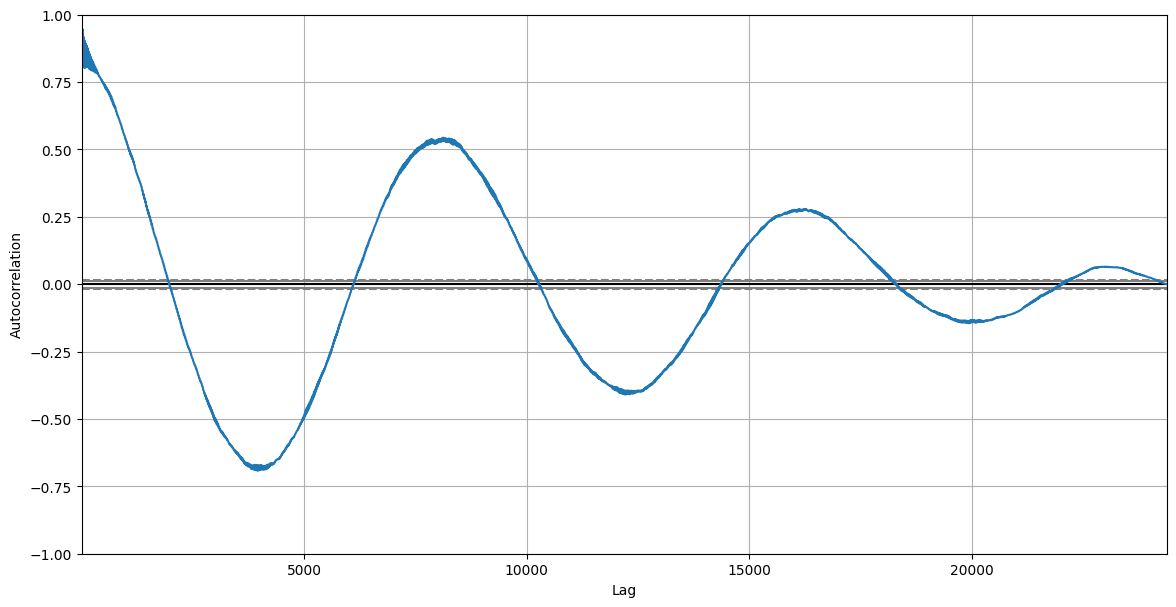

In [18]:
#before imputing missing values check autocorrelation and understand is there any correlation. 
# autocorrelation is the correlation of a signal with a delayed copy of itself as a function of delay.
# example: if the temperature is high today, it is likely to be high tomorrow as well.
# check the autocorrelation of the Temp column
"""
This cell checks the autocorrelation of the 'TEMP' column in the dataframe.
"""
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(14, 7))
pd.plotting.autocorrelation_plot(df['2014':'2016']['TEMP'])
plt.show()

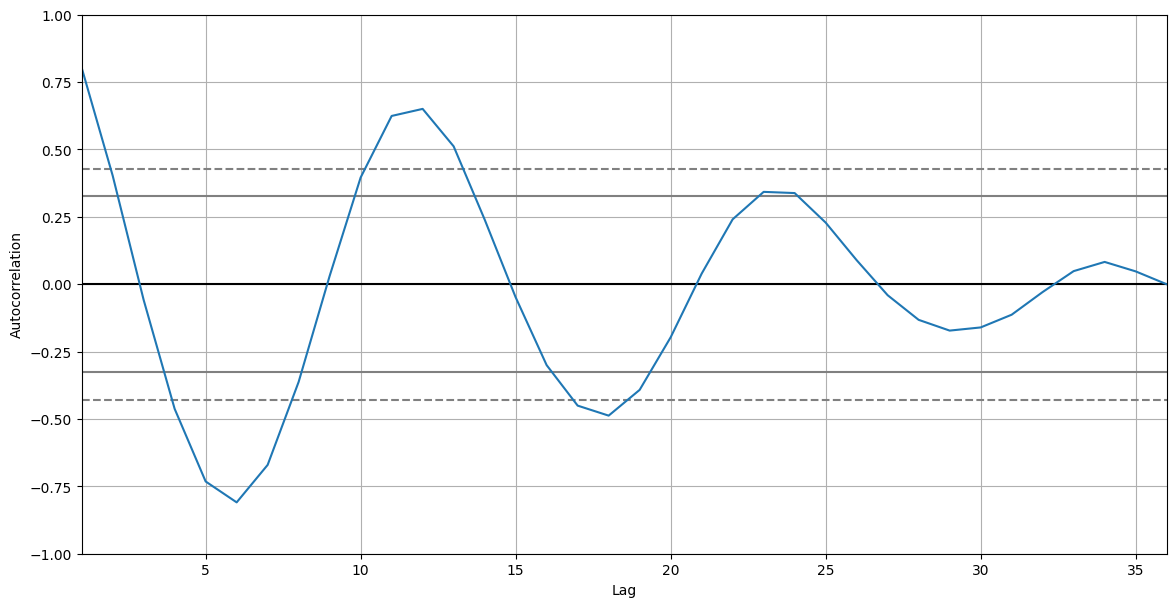

In [19]:
#resample the data to monthly frequency and check auto correlation
"""
This cell resamples the data to daily frequency and checks the autocorrelation of the 'TEMP' column.
"""
plt.figure(figsize=(14, 7))
pd.plotting.autocorrelation_plot(df['2014':'2016']['TEMP'].resample('ME').mean())
plt.show()

There is seanolity, so we can impute missing value with impute same value from last year


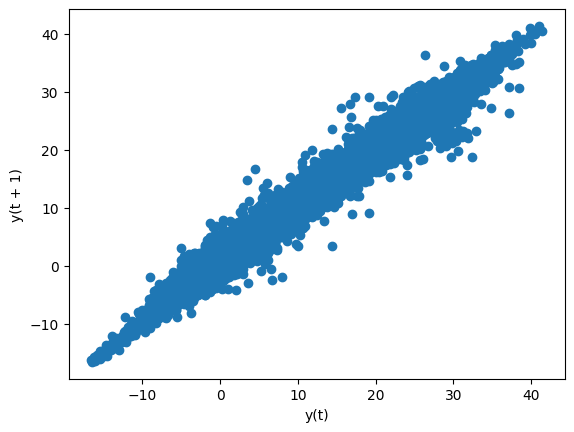

In [20]:
#Check correclation across multiple time lags
"""
This cell checks the correlation across multiple time lags for the 'TEMP' column.
"""
pd.plotting.lag_plot(df['TEMP'], lag=1)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

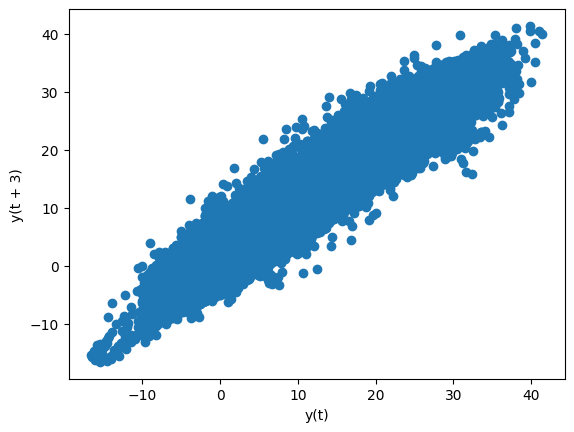

In [21]:
pd.plotting.lag_plot(df['TEMP'], lag=3)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

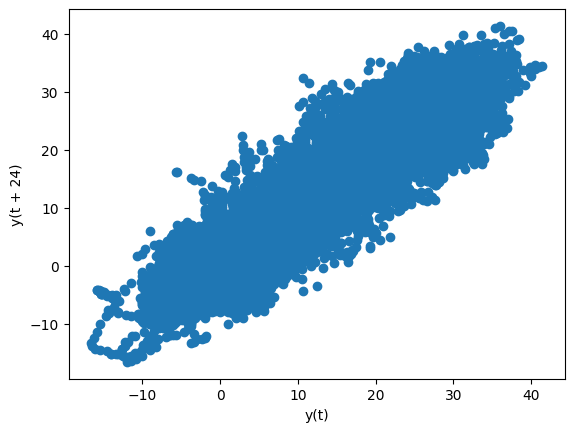

In [22]:
pd.plotting.lag_plot(df['TEMP'], lag=24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

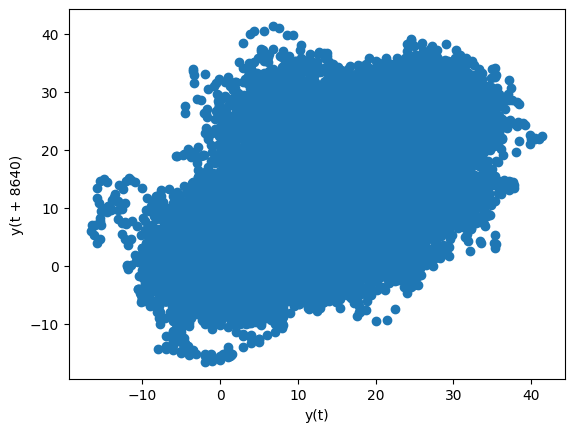

In [23]:
pd.plotting.lag_plot(df['TEMP'], lag=8640)

There is strong linearity in lag1, lag3, and lag24 compared with lag 8640. we can impute with previou year data or previous hour data or average of last three hours.

In [24]:
df_imp = data.copy()

In [25]:
df_imp.isnull().sum()

No            0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [26]:
#fill missing values using forward fill in temp column
"""
This cell fills the missing values in the 'TEMP' column using forward fill method.
"""
df_imp['TEMP'] = df_imp['TEMP'].ffill()

In [27]:
df_imp.isnull().sum()

No            0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP          0
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [36]:
#fill missing values in PM2.5 column using interpolation method
"""
This cell fills the missing values in the 'PM2.5' column using the interpolation method.
"""
df_imp['PM2.5'] = df_imp['PM2.5'].interpolate(method='linear')

In [37]:
df_imp.isnull().sum()

No            0
PM2.5         0
PM10        235
SO2         730
NO2        1234
CO         2012
O3            0
TEMP          0
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [38]:
#impute previous year value to fill the missing values in PM10 column
"""
This cell fills the missing values in the 'PM10' column using the previous year's value.
"""
df_imp['PM10'] = df_imp['PM10'].fillna(df_imp['PM10'].shift(8760))


In [39]:
df_imp.isnull().sum()

No            0
PM2.5         0
PM10        231
SO2         730
NO2        1234
CO         2012
O3            0
TEMP          0
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [40]:
#impute missing values in O3 column using interpolation method
"""
This cell fills the missing values in the 'O3' column using the interpolation method.
"""
df_imp['O3'] = df_imp['O3'].interpolate(method='linear')

In [41]:
df_imp.isnull().sum()

No            0
PM2.5         0
PM10        231
SO2         730
NO2        1234
CO         2012
O3            0
TEMP          0
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [42]:
#replace missing values in all columns with interpolation method
"""
This cell fills the missing values in all columns using the interpolation method.
"""
df_imp = df_imp.interpolate(method='linear')

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_22328\828100301.py:5: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [48]:
#fill missing values in wd column using forward fill method
"""
This cell fills the missing values in the 'wd' column using the forward fill method.
""" 

df_imp['wd'] = df_imp['wd'].ffill()

In [49]:
df_imp.isnull().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [50]:
df_imp['NO2'].isnull()

year_month_day_hour
2013-03-01 00:00:00     True
2013-03-01 01:00:00     True
2013-03-01 02:00:00    False
2013-03-01 03:00:00    False
2013-03-01 04:00:00    False
                       ...  
2017-02-28 19:00:00    False
2017-02-28 20:00:00    False
2017-02-28 21:00:00    False
2017-02-28 22:00:00    False
2017-02-28 23:00:00    False
Name: NO2, Length: 35064, dtype: bool

In [51]:
#use bfill method to fill missing values in NO2 column
"""
This cell fills the missing values in the 'NO2' column using the backward fill method.
"""
df_imp['NO2'] = df_imp['NO2'].bfill()

In [52]:
df_imp.isnull().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [53]:
#export the cleaned data to a new csv file
"""
This cell exports the cleaned data to a new csv file.
"""
df_imp.to_csv('cleaned_data.csv')